# Title

## Introduction

Our question is: Can age and experience predict whether or not a player is subscribed to a game-related newsletter in the players.csv dataset?

## Methods

In [1]:
#Run these beforehand
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [19]:
#Loading and cleaning dataset
players <- read_csv("players.csv")
#fix column names
colnames(players) <- c("experience","subscribe", "hashed_email", "played_hours", "name", "gender", "age")
#filter out NA values
players <- players |> 
    filter(!is.na(age)) |>
    filter(!is.na(experience))
#add a numeric experience column
players$experience_numeric <- recode(players$experience, 
                          "Pro" = 5,
                          "Veteran" = 4, 
                          "Regular" = 3, 
                          "Amateur" = 2, 
                          "Beginner" = 1)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


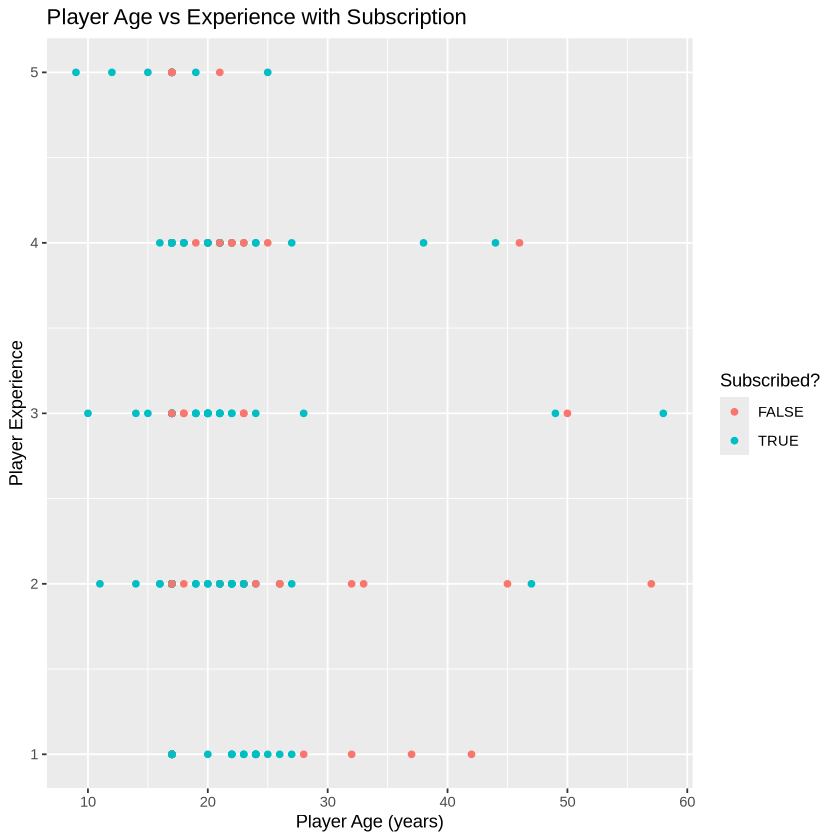

In [20]:
plot <- players |>
    ggplot(aes(x = age, y =  experience_numeric, colour = subscribe)) + 
        geom_point() +
        labs(x="Player Age (years)", y="Player Experience", colour="Subscribed?") +
        ggtitle("Player Age vs Experience with Subscription")
plot

## Results

## Discussion